In [1]:
import scipy.integrate as integrate
import scipy.optimize as optimize
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [8]:
rcParams['mathtext.fontset'] = 'stix'
rcParams['font.family'] = 'STIXGeneral'

data = pd.read_csv('C:\\Users\\marlo\\OneDrive - Universidad de los andes\\Documentos\\202320\\Laboratorio intermedio\\2. Doble rendija\\Bombilla\\Una rendija-Bombilla.csv',sep=';')
data_z = data['m'].to_numpy()
data_I = data['conteos/s'].to_numpy()
data_d = data['incertidumbre'].to_numpy()

def integral(f_r, f_i, a, b):
    real = integrate.quad(f_r, a, b)
    im = integrate.quad(f_i, a, b)
    return complex(real[0], im[0])

# Parametros
a= 0.0001
x= 0
d= 0.000457
D1= 0.5
D2= 0.5

In [48]:
def f_f_izq(z,lambda_r,b,c,d):
    I_izq=[]
    z=z-d
    for i in range(len(z)):    
        # Intensidad
        di_real= lambda y: np.cos(np.pi/(D1*lambda_r)*(x-y)**2 + np.pi/(D2*lambda_r)*(z[i]-y)**2)
        di_img= lambda y: np.sin(np.pi/(D1*lambda_r)*(x-y)**2 + np.pi/(D2*lambda_r)*(z[i]-y)**2)
        i_izq= np.exp(2*np.pi*1j*(D1+D2)/lambda_r)*integral(di_real, di_img,-d/2-a/2, -d/2+a/2)
        I_izq.append(abs(i_izq)**2)
    return b*np.array(I_izq)+c
    
def f_fr_sencilla(z,lambda_r,b,c):
    return b*np.cos(np.pi/lambda_r*d*np.sin(z))**2+c

In [49]:
guess_0=[700e-9,1e12,1000,0.001]
guess_1=[10000e-9,1e4,1000]
parametros_f, covarianza_f = optimize.curve_fit(f_f_izq, data_z, data_I, p0=guess_0)
parametros_fr, covarianza_fr = optimize.curve_fit(f_fr_sencilla, data_z, data_I, p0=guess_1)
incertidumbre_f = np.sqrt(np.diag(covarianza_f))
incertidumbre_fr = np.sqrt(np.diag(covarianza_fr))
print(parametros_f) 
print(incertidumbre_f)
print(parametros_fr) 
print(incertidumbre_fr)

C:\Users\marlo\AppData\Local\Temp\ipykernel_3636\2873727543.py:11: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  im = integrate.quad(f_i, a, b)
C:\Users\marlo\AppData\Local\Temp\ipykernel_3636\2873727543.py:10: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integ

[6.26937348e-07 1.46041804e+12 1.88748909e+03 3.54901241e+02]
[8.78161464e-12 3.46143417e+10 1.91381224e+02 6.08277302e-03]
[2.92622803e-06 1.48084781e+04 9.41332245e+02]
[5.20303593e-08 3.87012737e+02 2.49146312e+02]


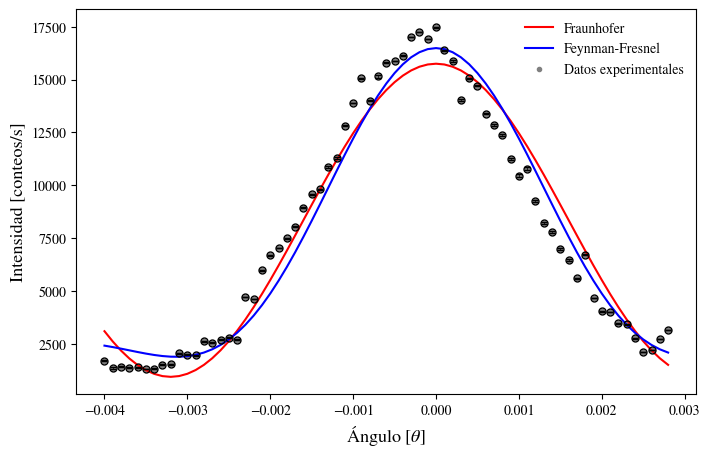

In [50]:
fig, ax1 = plt.subplots(figsize=(8, 5))

ax1.set_xlabel(r'Ángulo $[\theta]$', fontsize=13, color='black')
ax1.set_ylabel('Intensidad [conteos/s]', fontsize=13, color='black')
ax1.tick_params(axis='both', colors='black')
ax1.spines['bottom'].set_color('black')
ax1.spines['top'].set_color('black')
ax1.spines['left'].set_color('black')
ax1.spines['right'].set_color('black')

ax1.plot(data_z, f_fr_sencilla(data_z, *parametros_fr), label='Fraunhofer', c='red')
ax1.plot(data_z, f_f_izq(data_z, *parametros_f), label='Feynman-Fresnel', c='blue')
ax1.scatter(data_z, data_I, c='gray', marker='.', label='Datos experimentales')
ax1.errorbar(data_z, data_I, yerr=data_d, fmt='.', capsize=2,
                elinewidth=0.5, markerfacecolor='none', markersize=10, color='black')
ax1.legend(frameon=False)

plt.savefig('Una rendija_bombilla.png',dpi=600)

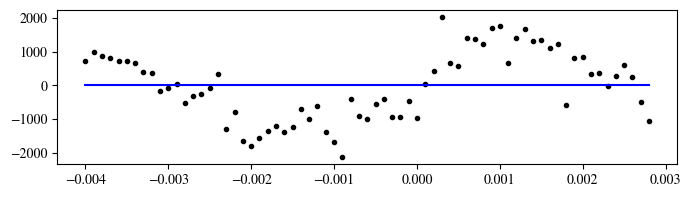

In [51]:
#Residuales feynamn-fresnel
residuals_f_f= f_f_izq(data_z, *parametros_f)-data_I
plt.figure(figsize=(8,2))
plt.scatter(data_z, residuals_f_f, marker='.',c='black')
plt.plot(data_z,np.zeros(len(data_z)),c='blue')
plt.savefig('Residuales_Una_rendija_f.png', dpi=600)

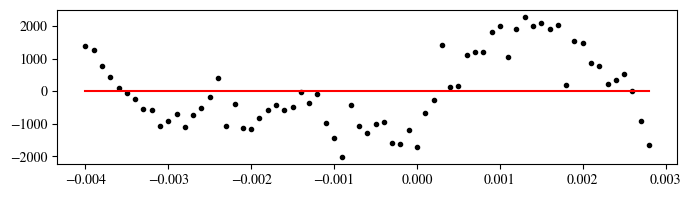

In [52]:
#Residuales fraunhofer
residuals_f_fr= f_fr_sencilla(data_z, *parametros_fr)-data_I

plt.figure(figsize=(8,2))
plt.scatter(data_z, residuals_f_fr, marker='.',c='black')
plt.plot(data_z,np.zeros(len(data_z)),c='red')
plt.savefig('Residuales_Una_rendija_fr.png',dpi=600)